/tmp/ipython-input-331032746.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)   #download from yahoo
[*********************100%***********************]  1 of 1 completed


GARCH(1,1): AIC=7501.46, BIC=7524.71, LogLik=-3746.73
EGARCH(1,1): AIC=7516.22, BIC=7539.48, LogLik=-3754.11
GJR-GARCH(1,1): AIC=7403.76, BIC=7432.83, LogLik=-3696.88


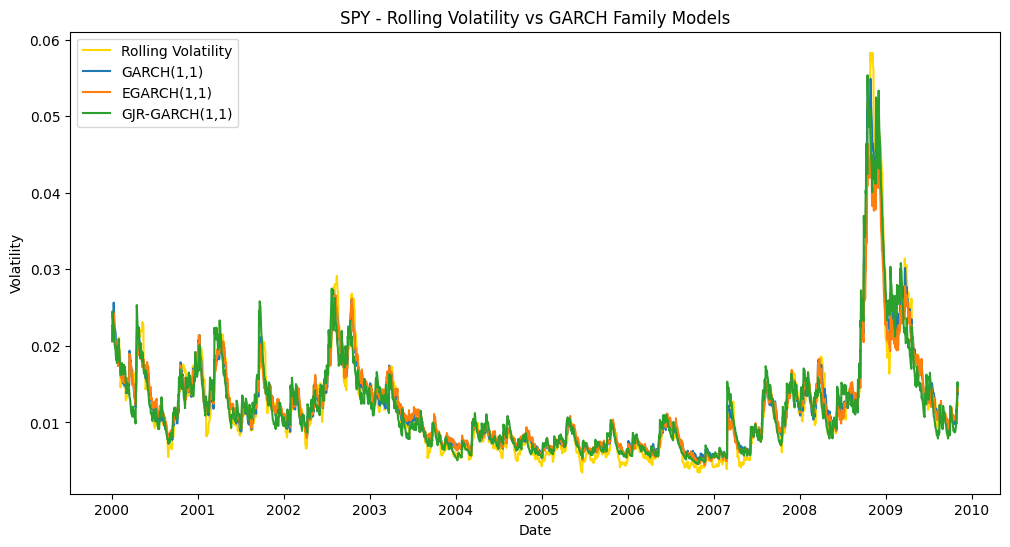

In [28]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt                     #use .pyplot because it like MATLAB so easier
import pandas as pd
from arch import arch_model                                        # Import ARCH package for volatility modeling, use PIP install before using this one

ticker = "SPY"                                     #ticker and period
start = "2000-01-01"
end = "2009-11-04"

stock = yf.download(ticker, start=start, end=end)   #download from yahoo
#log return function
def log_returns(df, ticker):

  if isinstance(df.columns, pd.MultiIndex):         # If the DataFrame has multi-level columns
    close = df[('Close', ticker)]                   # Extract closing prices for that ticker
  else:
    close = df['Close']                             # Otherwise, just use 'Close' column

  return np.log(1 + close.pct_change()).dropna()    #return log returns and drop all NaNs
# Function to compute rolling volatility (standard deviation of log returns)
def rolling_volatility(log_ret, window=21):
  return log_ret.rolling(window=window).std()       # 21 day rolling volatility (more or less one trading month)

log = log_returns(stock, ticker)
rolling_vol = rolling_volatility(log, window=21).dropna()
log.name = 'LogReturns'                             #renaming in the GARCH model summary because it confusing


# NEW FUNCTION
def compare_all_garch(log, rolling_vol, ticker):
  models = {
      "GARCH(1,1)": arch_model(log * 100, vol="GARCH", p=1, q=1),
      "EGARCH(1,1)": arch_model(log * 100, vol="EGARCH", p=1, q=1),
      "GJR-GARCH(1,1)": arch_model(log * 100, vol="GARCH", p=1, o=1, q=1),
      #add any GARCH here if you want
  }

  results = {}
  for name, model in models.items():
      res = model.fit(disp="off")
      results[name] = res
      print(f"{name}: AIC={res.aic:.2f}, BIC={res.bic:.2f}, LogLik={res.loglikelihood:.2f}")

  # Plot
  plt.figure(figsize=(12,6))
  plt.plot(rolling_vol, color="gold", label="Rolling Volatility")

  for name, res in results.items():
      plt.plot(res.conditional_volatility / 100, label=name)

  plt.title(f"{ticker} - Rolling Volatility vs GARCH Family Models")
  plt.xlabel("Date")
  plt.ylabel("Volatility")
  plt.legend()
  plt.show()
  return results
results = compare_all_garch(log, rolling_vol, ticker)


In [2]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 35.7 MB/s eta 0:00:00
